In [17]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [18]:
df = pd.read_csv('../data/model_y_data.csv',sep=';')
print(len(df))
df.head()

272


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,575.000 kr.,2022,22000,2021-08-28,El,65.3,514,A,5750
1,499.000 kr.,2021,21000,2021-08-20,El,65.3,514,A,9500
2,549.900 kr.,2022,17000,2022-03-15,El,65.3,514,A,9440
3,579.900 kr.,2022,25000,2021-12-10,El,65.3,514,A,2970
4,504.900 kr.,2022,9000,2022-03-23,El,65.3,514,A,2100


In [19]:
#Cleans price and first regestration
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,575000,2022,22000,2021,El,65.3,514,A,5750
1,499000,2021,21000,2021,El,65.3,514,A,9500
2,549900,2022,17000,2022,El,65.3,514,A,9440
3,579900,2022,25000,2021,El,65.3,514,A,2970
4,504900,2022,9000,2022,El,65.3,514,A,2100
...,...,...,...,...,...,...,...,...,...
267,489900,2021,9900,2021,El,65.3,514,A,8766
268,539900,2021,14000,2021,El,65.3,514,A,9430
269,505000,2022,18000,2022,El,65.3,384,A,7800
270,509900,2021,28000,2021,El,65.3,514,A,8920


In [20]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power']]
y = df['price']

In [21]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [22]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.25560135535862805


In [23]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 537731.76kr - actual price: 528800kr
Car 2: Predicted price: 530365.52kr - actual price: 489000kr
Car 3: Predicted price: 525495.65kr - actual price: 504900kr
Car 4: Predicted price: 521138.02kr - actual price: 539900kr
Car 5: Predicted price: 494437.7kr - actual price: 499000kr


In [24]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [25]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

94.94987721188218

<h2> Decision tree regressor

In [26]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.21086975721227652

In [27]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 574999.0kr - actual price: 528800kr
Car 2: Predicted price: 503420.0kr - actual price: 489000kr
Car 3: Predicted price: 526333.33kr - actual price: 504900kr
Car 4: Predicted price: 536566.67kr - actual price: 539900kr
Car 5: Predicted price: 519900.0kr - actual price: 499000kr


In [28]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

95.36865230299239

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code
price,1.000000,0.245718,-0.388971,0.233788,0.113745,0.238902,0.079679
model_year,0.245718,1.000000,-0.526441,0.963347,-0.083208,-0.060330,0.044634
km,-0.388971,-0.526441,1.000000,-0.559311,0.135286,-0.035308,-0.089035
reg,0.233788,0.963347,-0.559311,1.000000,-0.084754,-0.066788,0.046570
fuel_economy,0.113745,-0.083208,0.135286,-0.084754,1.000000,0.230933,0.060696
horse_power,0.238902,-0.060330,-0.035308,-0.066788,0.230933,1.000000,-0.171483
zip_code,0.079679,0.044634,-0.089035,0.046570,0.060696,-0.171483,1.000000


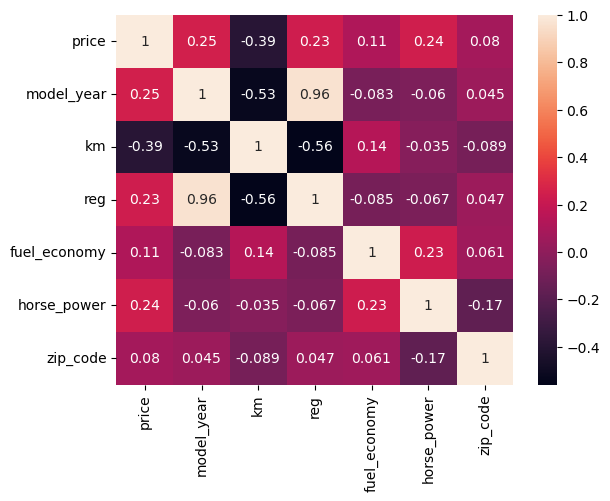

In [29]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

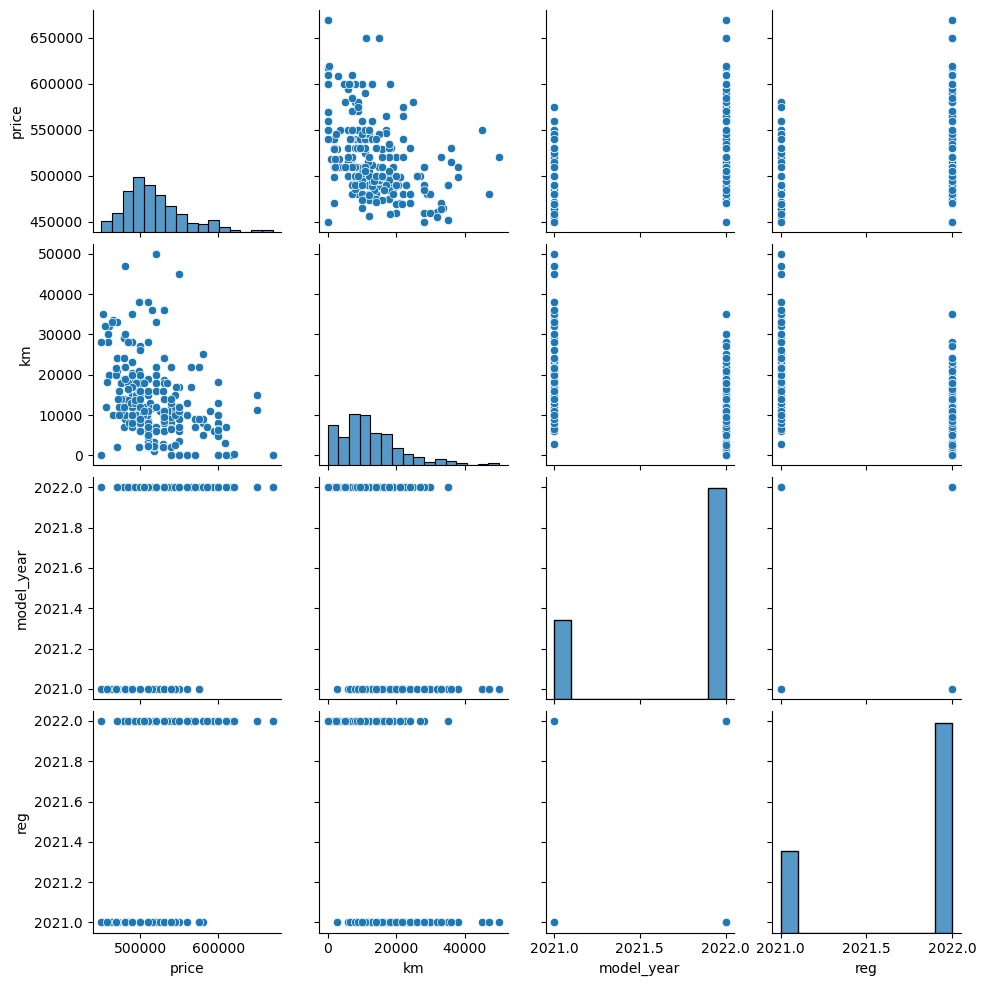

In [30]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

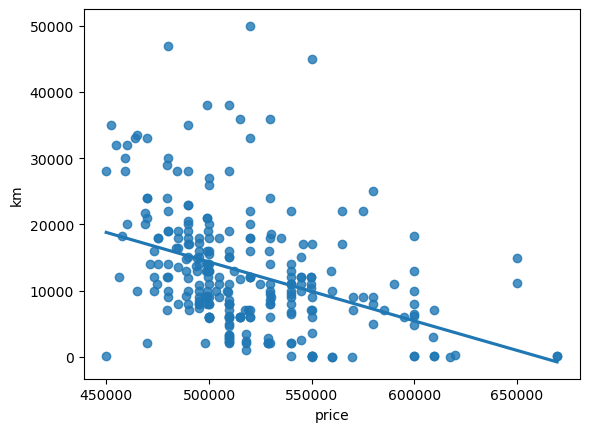

In [31]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

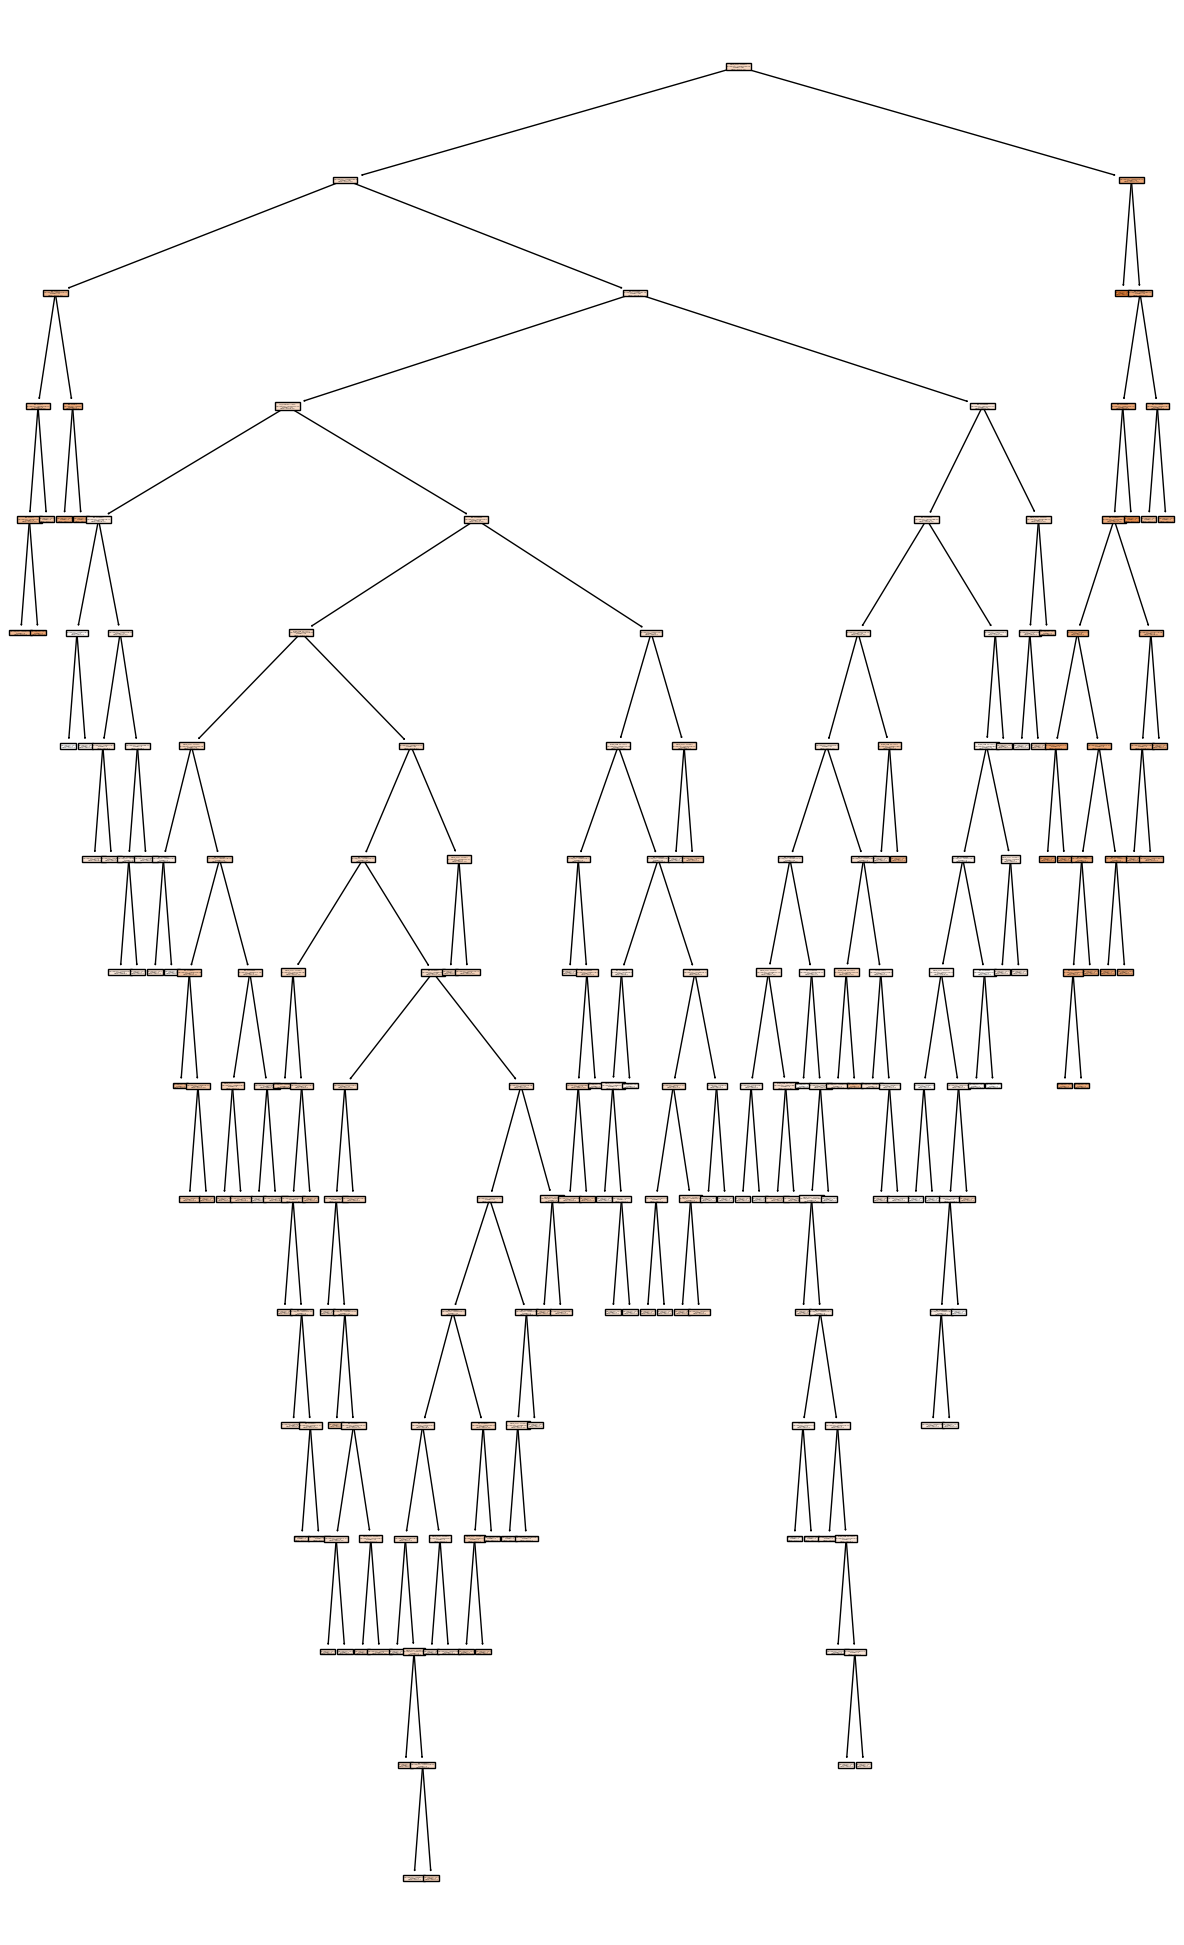

In [32]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)